In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import catboost as cb


#Model Evaluation
from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay


%matplotlib inline

In [14]:
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

In [15]:
X_train.drop(labels="Unnamed: 0",axis=1,inplace = True)
y_train.drop(labels="Unnamed: 0",axis=1,inplace = True)
X_test.drop(labels="Unnamed: 0",axis=1,inplace = True)
y_test.drop(labels="Unnamed: 0",axis=1,inplace = True)

In [16]:
X_train

,0,1,2,3,4,5,0.1,1.1,2.1,3.1,...,76,77,78,79,80,81,82,83,84,85
0,0.690322,0.510163,-0.031815,0.894653,-0.216743,-0.035664,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.556216,0.488648,1.134777,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.836973,-1.383327,2.301369,1.887635,-0.216743,0.774269,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.216148,0.001015,-0.420679,-0.145975,-0.216743,0.369303,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.776193,-0.780351,-0.420679,-0.145975,-0.216743,0.369303,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22770,-0.042936,-0.017032,1.912505,-0.145975,-0.216743,-0.035664,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22771,1.790208,0.252306,1.134777,-0.145975,-0.216743,-1.250563,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22772,-1.509451,0.251084,-1.198407,-0.145975,-0.216743,-1.655530,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22773,-0.336239,0.503806,0.357049,-0.145975,-0.216743,0.774269,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
y_train

,income
0,1
1,0
2,1
3,0
4,0
...,...
22770,0
22771,0
22772,0
22773,0


In [18]:
targets = ["0" , "1"]

In [19]:
def plot_roc_and_pr_curve(model_name, model, X_test, y_test, y_pred):
    try:
        # Create RocCurveDisplay
        fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

        # Create PrecisionRecallDisplay
        pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred)

        # Combining the display objects into a single plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

        roc_display.plot(ax=ax1)
        pr_display.plot(ax=ax2)
        
        # Save the plot with a descriptive file name and the desired format (e.g., PNG)
        plt.savefig(f"plots/{model_name}_roc_and_pr.png")
        
        plt.show()
    except Exception as e:
        print(e)


In [20]:
# creating logging for tracking model performance
def logging(Model_name,Time,training_accuracy_score,Classification_report,Confusion_matirx):
    data  = f'''\n"ModelName" : {Model_name},
               "TrainingTime" : {Time},
               "Training Accuracy" : {training_accuracy_score},
               "ConfusionMatrics" : {Confusion_matirx},
               "ClassificationReport" : {Classification_report}\n'''
               
    with open("logs/report.txt","a+") as f:
        f.write(data)


In [21]:
def model_evaluation(ModelName,training_time, model,X_train,y_train, y_test, y_pred, X_test):
    # Calculate accuracy
    training_accuracy_score = model.score(X_train,y_train)
    print("Training Accuracy :",training_accuracy_score)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", accuracy)
    
    #Printing classification report
    cr = classification_report(y_test, y_pred,target_names=targets,output_dict=False)    
    print(f"\nClassification Report:\n{cr}")
    cr = classification_report(y_test, y_pred,target_names=targets,output_dict=True)

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion matirx :\n{cm}")
    
    try:
        y_pred_probs = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test,y_pred_probs[:, 1])
        print("\nAUC-ROC Score:", auc_roc)
    except Exception as e:
        print(e)
    
    print("\nPlotting Graphs\n")
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=targets)
    display.plot(include_values=True, cmap='Blues', ax=plt.gca())

    plot_roc_and_pr_curve("LogisticRegression",model,X_test,y_test,y_pred)
    
    logging(ModelName,training_accuracy_score,training_time,cr,cm)
    
    json_data = {"ModelName": ModelName,
                 "Training accuracy":training_accuracy_score,
                 "ClassificationReport": cr}
    json_file_path = "logs/json_data.json"
    with open(json_file_path, 'a+') as json_file:
        json.dump(json_data, json_file, indent=4)
     

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Training time: 0.52 seconds
Training Accuracy : 0.8521624588364435

Accuracy: 0.852181929932391

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7405
           1       0.73      0.61      0.67      2357

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762


Confusion matirx :
[[6876  529]
 [ 914 1443]]

AUC-ROC Score: 0.9047489097512056

Plotting Graphs



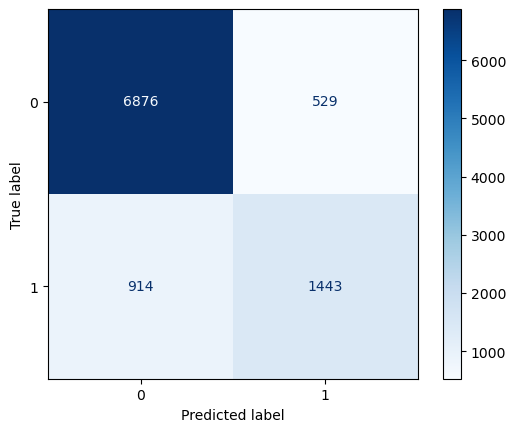

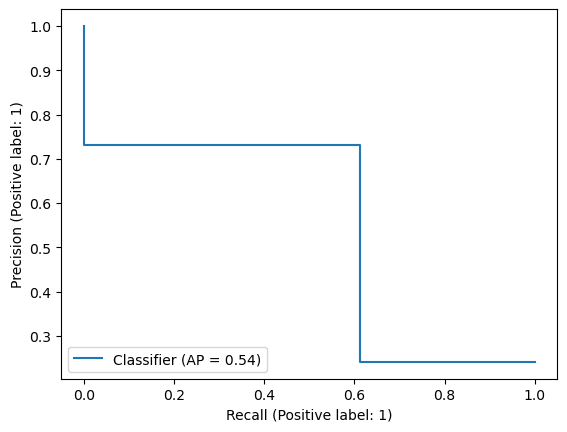

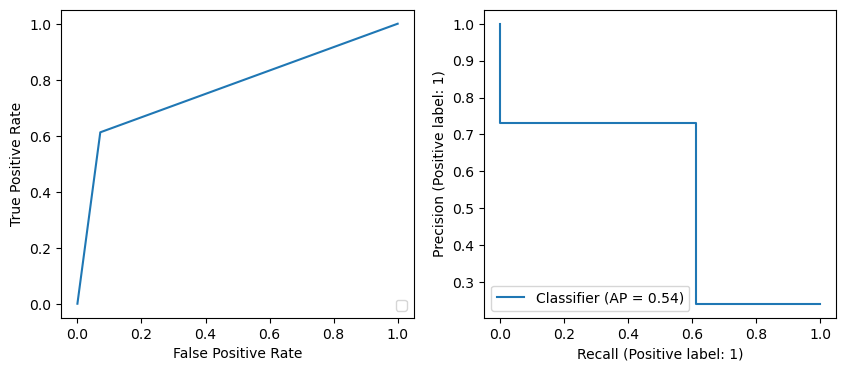

------------------------------


In [11]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

start_time = time.time()
# Create the LogisticRegression classifier
model = LogisticRegression(C = 0.1, penalty = 'l2')

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

# Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

model_evaluation("LogisticRegression", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

In [30]:
model_name = type(model).__name__

In [31]:
model1_name

'LogisticRegression'

Training time: 1.42 seconds


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 0.7797585071350165

Accuracy: 0.770641262036468

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      7405
           1       0.52      0.84      0.64      2357

    accuracy                           0.77      9762
   macro avg       0.73      0.80      0.74      9762
weighted avg       0.84      0.77      0.79      9762


Confusion matirx :
[[5533 1872]
 [ 367 1990]]

AUC-ROC Score: 0.8873025513096592

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


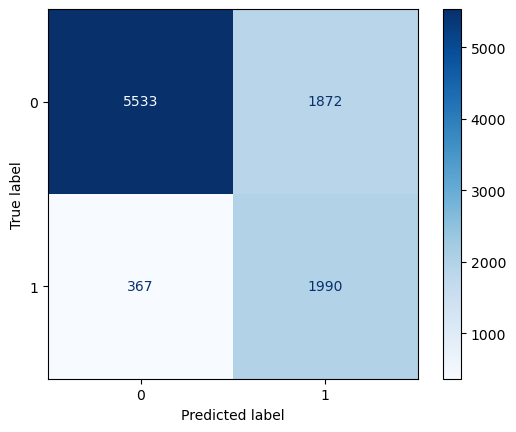

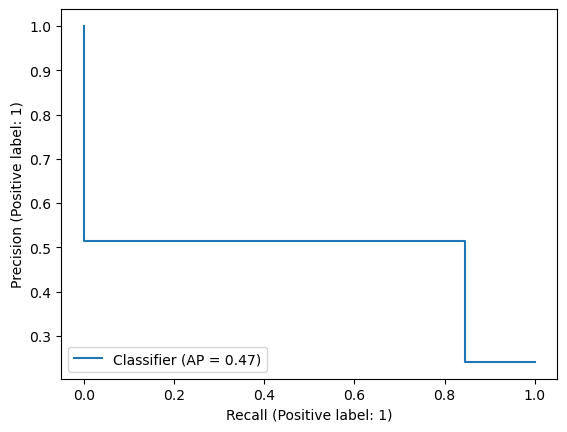

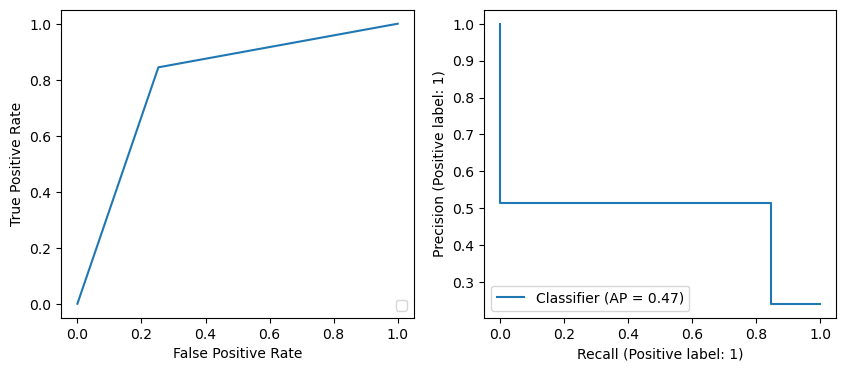

------------------------------


In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=None, var_smoothing=0.05).fit(X_train,y_train)

# Train the ensemble model
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("GaussianNB", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Training time: 2.81 seconds
Training Accuracy : 0.9999560922063666

Accuracy: 0.8159188690842041

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7405
           1       0.61      0.64      0.63      2357

    accuracy                           0.82      9762
   macro avg       0.75      0.75      0.75      9762
weighted avg       0.82      0.82      0.82      9762


Confusion matirx :
[[6465  940]
 [ 857 1500]]

AUC-ROC Score: 0.7547304751430723

Plotting Graphs



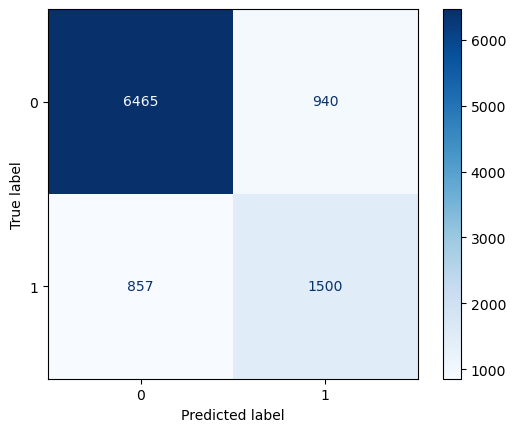

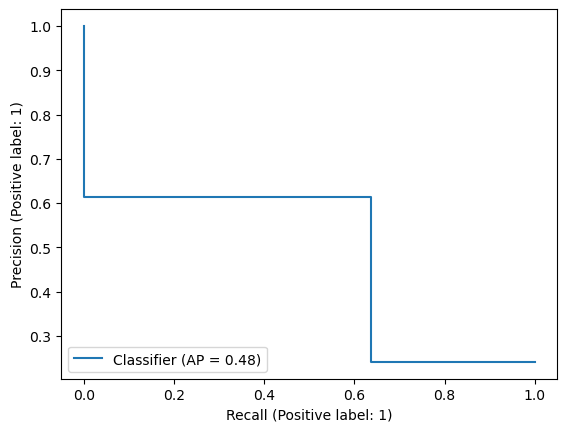

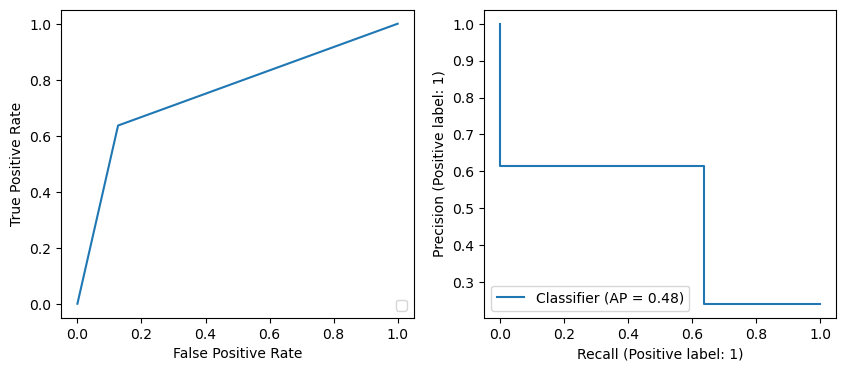

------------------------------


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train,y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("DecisionTreeClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training time: 8.17 seconds
Training Accuracy : 0.9254884742041712

Accuracy: 0.8632452366318377

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7405
           1       0.78      0.60      0.68      2357

    accuracy                           0.86      9762
   macro avg       0.83      0.77      0.80      9762
weighted avg       0.86      0.86      0.86      9762


Confusion matirx :
[[7009  396]
 [ 939 1418]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.9155451158028565

Plotting Graphs



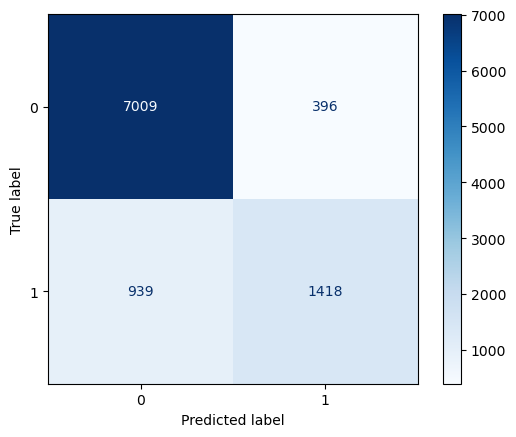

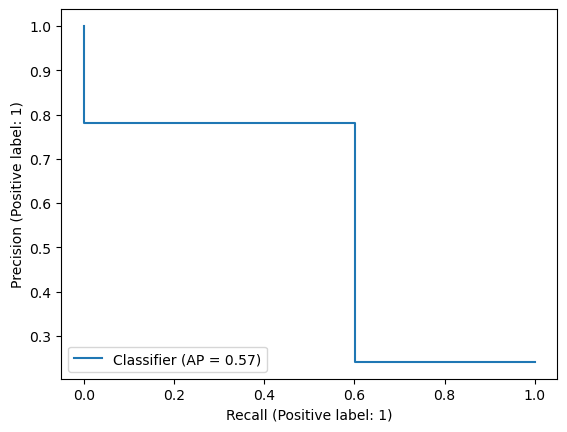

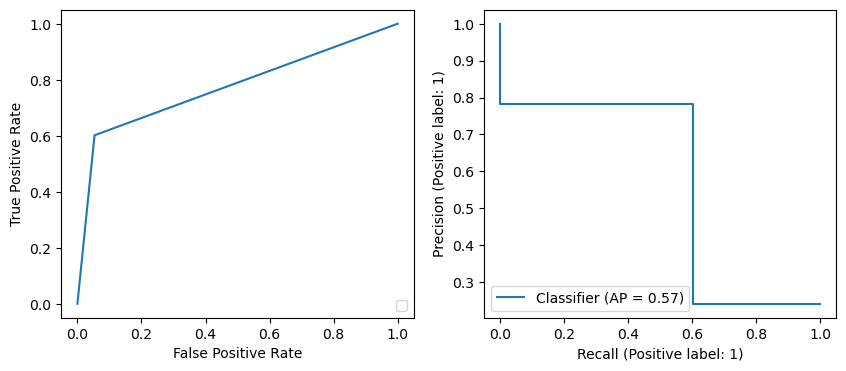

------------------------------


In [14]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

start_time = time.time()
# Create the RandomForestClassifier
model = RandomForestClassifier(max_depth=20, n_estimators=200)

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("RandomForestClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 30.61 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Training Accuracy : 0.8679253567508233

Accuracy: 0.853820938332309

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7405
           1       0.75      0.60      0.66      2357

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762


Confusion matirx :
[[6929  476]
 [ 951 1406]]
predict_proba is not available when  probability=False

Plotting Graphs



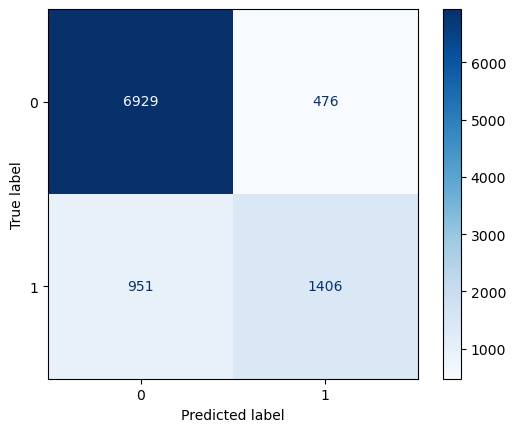

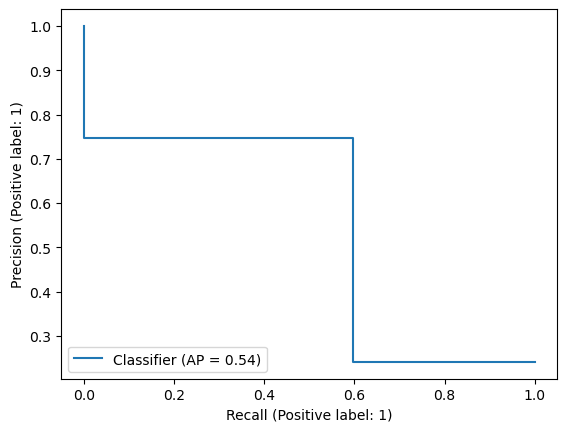

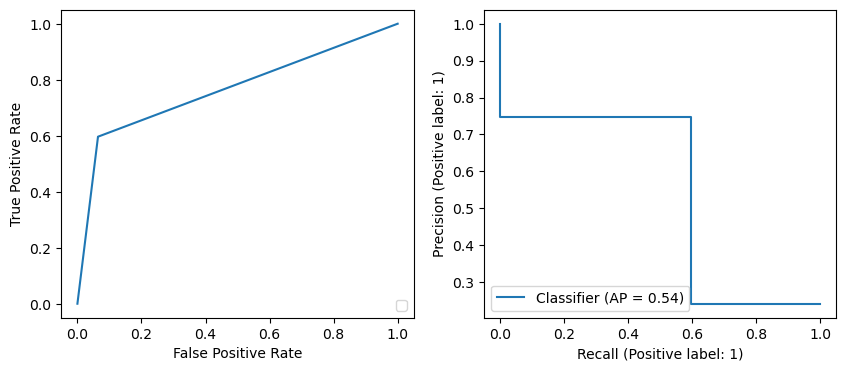

------------------------------


In [15]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

start_time = time.time()
# Create the SVC classifier
model = SVC(C = 1, kernel = 'rbf')

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("SVC", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 10.31 seconds
Training Accuracy : 0.8753018660812294

Accuracy: 0.8686744519565662

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7405
           1       0.79      0.62      0.70      2357

    accuracy                           0.87      9762
   macro avg       0.84      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Confusion matirx :
[[7008  397]
 [ 885 1472]]

AUC-ROC Score: 0.9206727156627132

Plotting Graphs



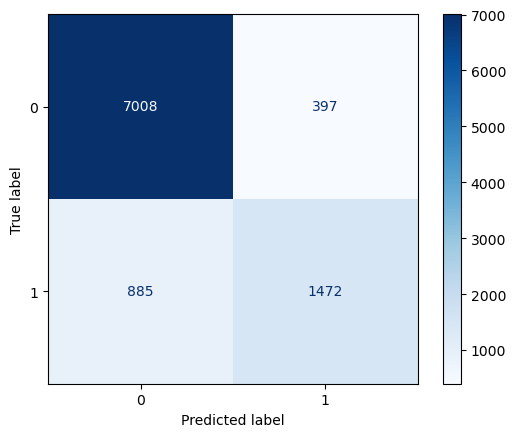

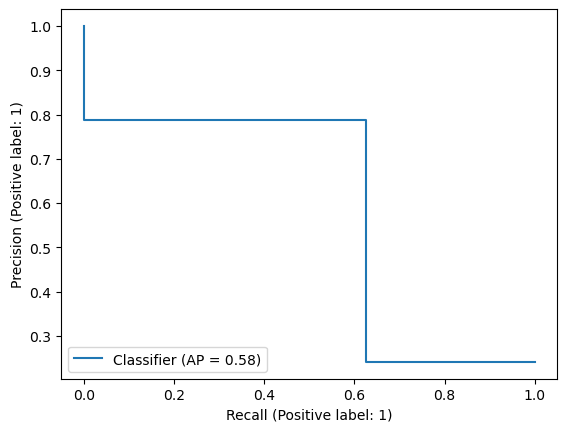

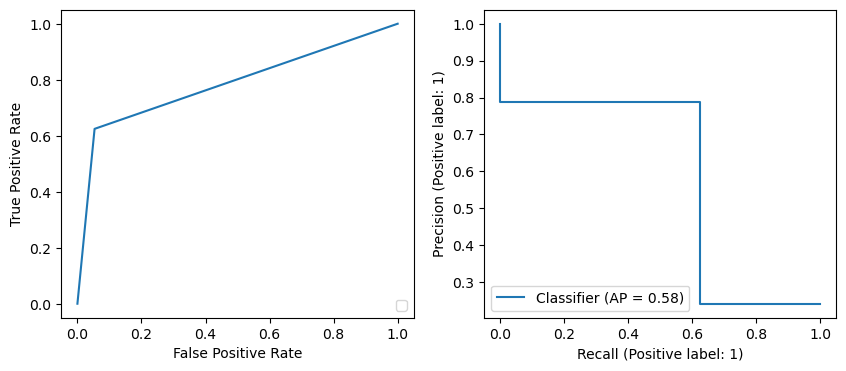

------------------------------


In [16]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=150)

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("GradientBoostingClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

Training time: 3.71 seconds
Training Accuracy : 0.919648737650933

Accuracy: 0.8667281294816636

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7405
           1       0.76      0.65      0.70      2357

    accuracy                           0.87      9762
   macro avg       0.83      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762


Confusion matirx :
[[6920  485]
 [ 816 1541]]

AUC-ROC Score: 0.9244616507153115

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


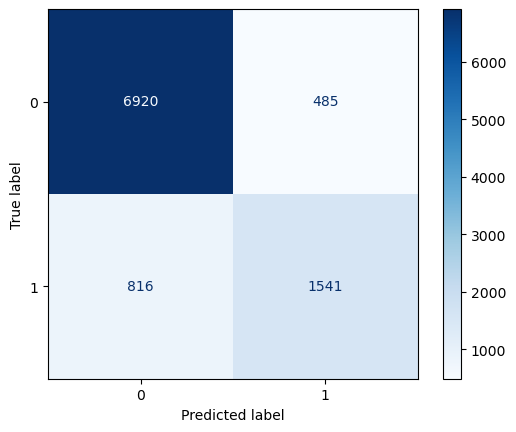

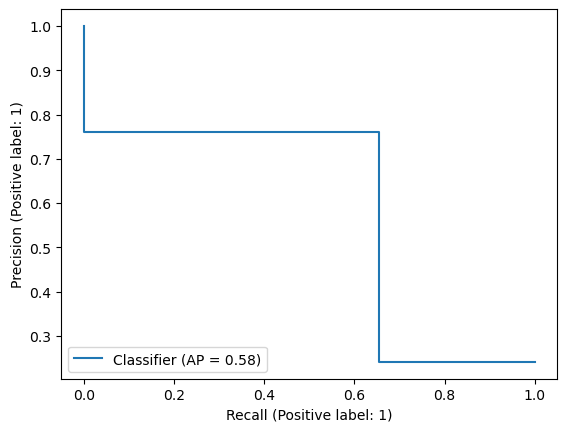

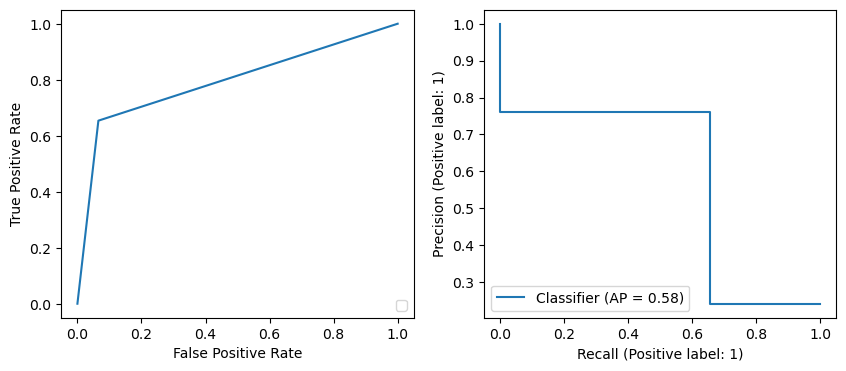

------------------------------


In [17]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the XGBClassifier
model = XGBClassifier(learning_rate = 0.2, n_estimators = 200)

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("XGBClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 1.03 seconds
Training Accuracy : 0.8908891328210757

Accuracy: 0.8682646998565867

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7405
           1       0.77      0.65      0.70      2357

    accuracy                           0.87      9762
   macro avg       0.83      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762


Confusion matirx :
[[6951  454]
 [ 832 1525]]

AUC-ROC Score: 0.9237487885726627

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


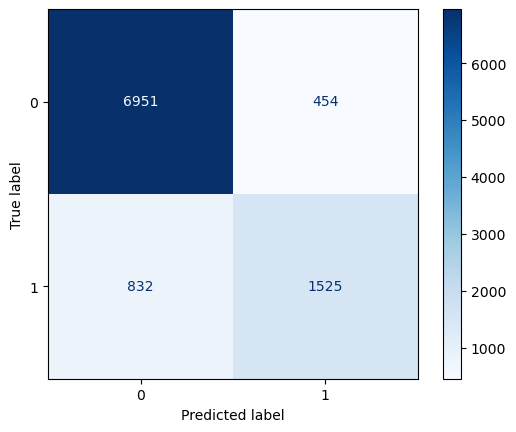

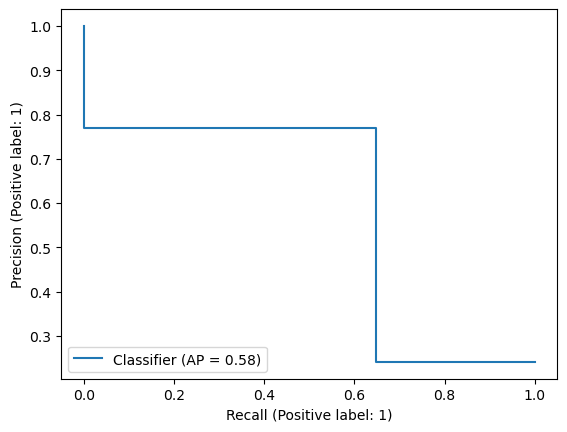

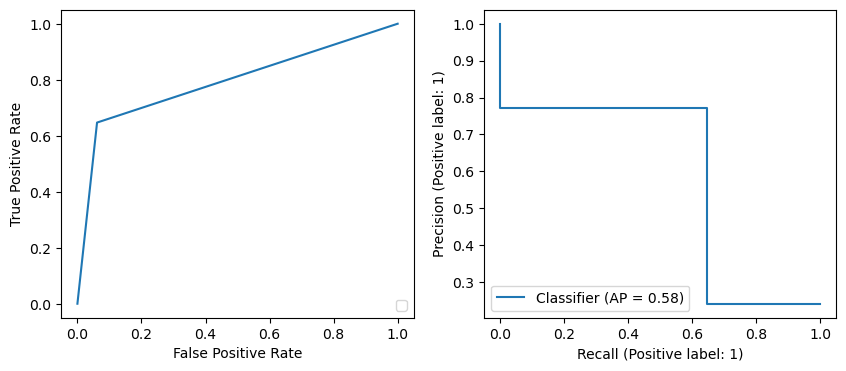

------------------------------


In [18]:
param_grid = {
    'max_depth': [None, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(learning_rate=0.2, max_depth=10)

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("HistGradientBoostingClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\RACHIT\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training time: 4.13 seconds
Training Accuracy : 0.905993413830955

Accuracy: 0.8116164720344192

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      7405
           1       0.57      0.85      0.69      2357

    accuracy                           0.81      9762
   macro avg       0.76      0.83      0.78      9762
weighted avg       0.85      0.81      0.82      9762


Confusion matirx :
[[5915 1490]
 [ 349 2008]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.9082297992074407

Plotting Graphs



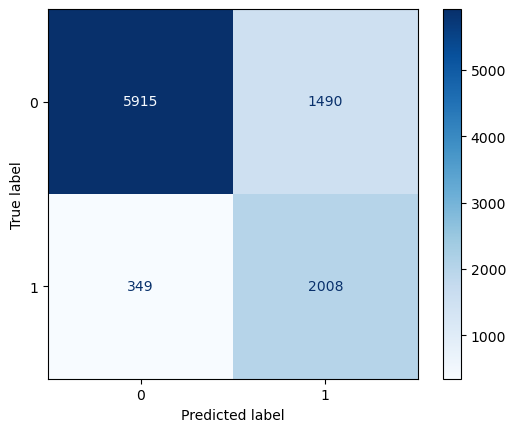

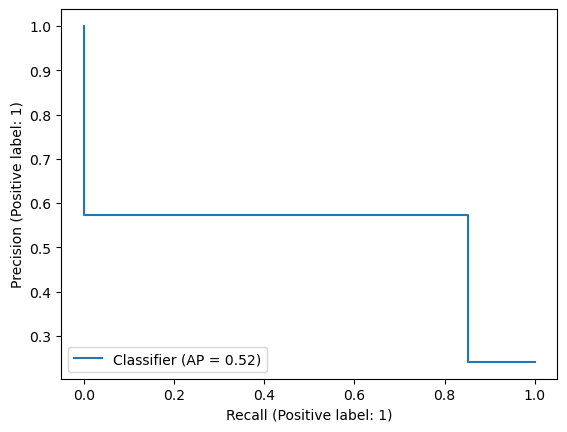

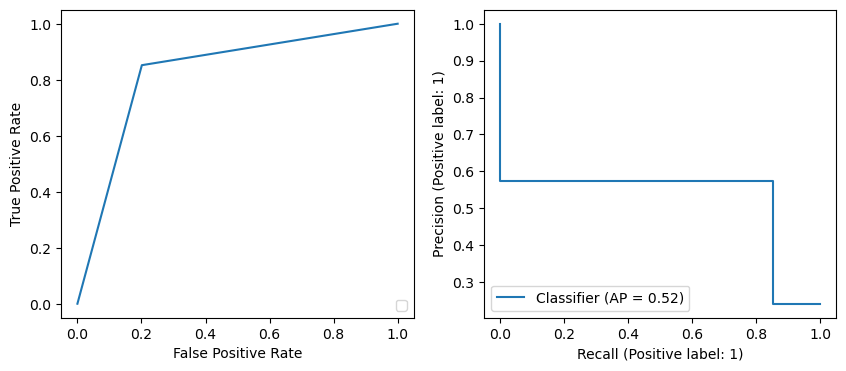

------------------------------


In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

start_time = time.time()
# Create the BalancedRandomForestClassifier
model = BalancedRandomForestClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("BalancedRandomForestClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 127.70 seconds
Training Accuracy : 0.8262129527991219

Accuracy: 0.8139725466093014

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87      7405
           1       0.58      0.85      0.69      2357

    accuracy                           0.81      9762
   macro avg       0.76      0.83      0.78      9762
weighted avg       0.85      0.81      0.82      9762


Confusion matirx :
[[5951 1454]
 [ 362 1995]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.9153906776172346

Plotting Graphs



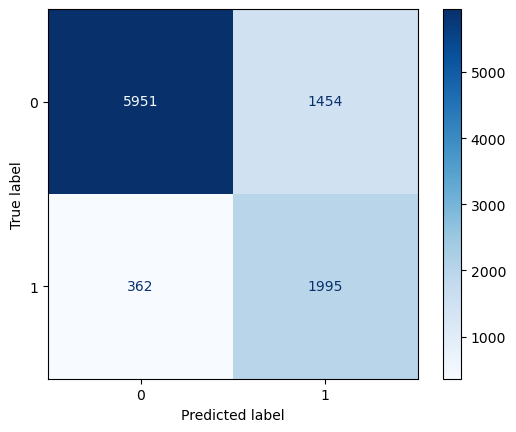

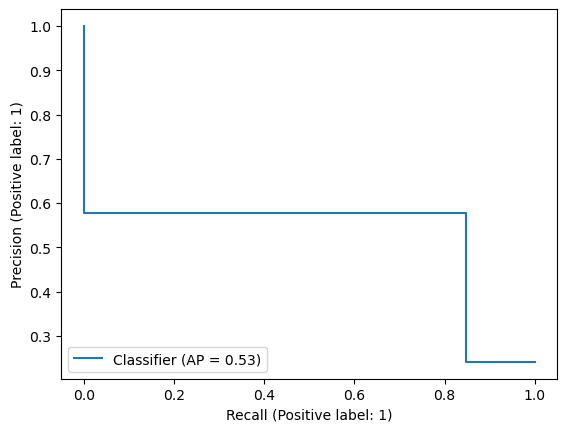

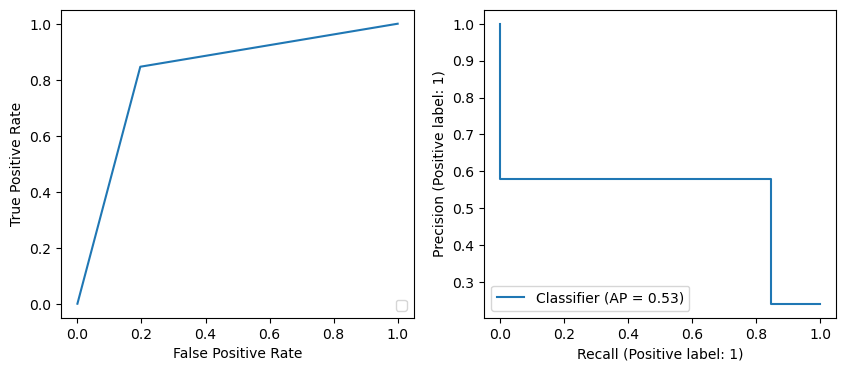

------------------------------


In [20]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
}

start_time = time.time()
# Create the EasyEnsembleClassifier
model = EasyEnsembleClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("EasyEnsembleClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 8.10 seconds
Training Accuracy : 0.8584412733260154

Accuracy: 0.8620159803318992

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7405
           1       0.78      0.59      0.67      2357

    accuracy                           0.86      9762
   macro avg       0.83      0.77      0.79      9762
weighted avg       0.86      0.86      0.86      9762


Confusion matirx :
[[7019  386]
 [ 961 1396]]

AUC-ROC Score: 0.914345591464447

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


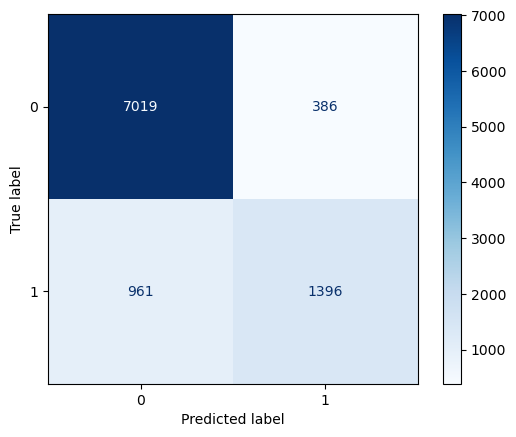

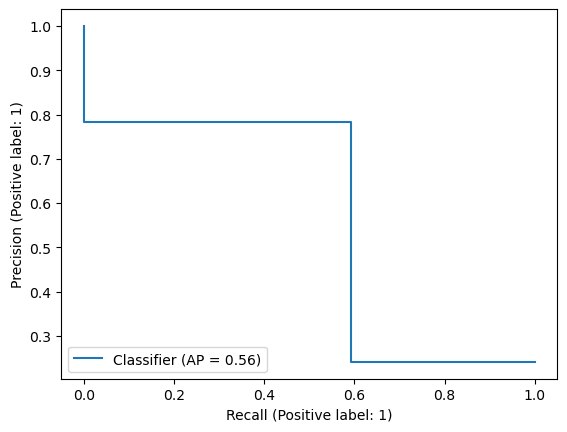

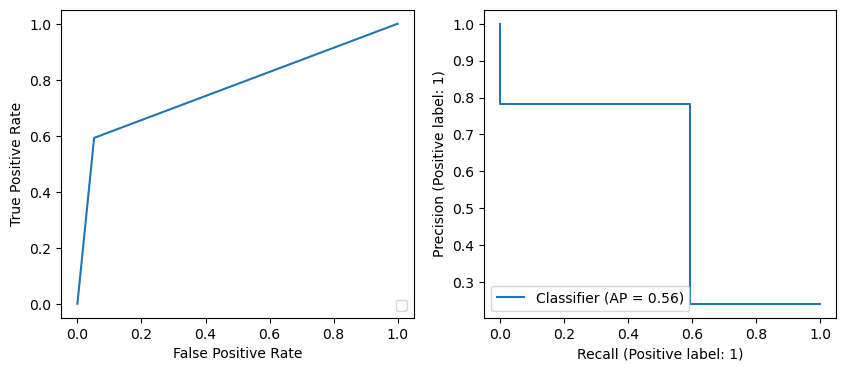

------------------------------


In [21]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the AdaBoostClassifier
model = AdaBoostClassifier(learning_rate=0.2, n_estimators=200)

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))
# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("AdaBoostClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

0:	learn: 0.8381120	total: 172ms	remaining: 2m 52s
1:	learn: 0.8430735	total: 184ms	remaining: 1m 31s
2:	learn: 0.8421076	total: 196ms	remaining: 1m 5s
3:	learn: 0.8473765	total: 207ms	remaining: 51.6s
4:	learn: 0.8464105	total: 218ms	remaining: 43.3s
5:	learn: 0.8480790	total: 228ms	remaining: 37.8s
6:	learn: 0.8481668	total: 238ms	remaining: 33.8s
7:	learn: 0.8484742	total: 248ms	remaining: 30.8s
8:	learn: 0.8487816	total: 259ms	remaining: 28.5s
9:	learn: 0.8490011	total: 269ms	remaining: 26.6s
10:	learn: 0.8487816	total: 279ms	remaining: 25.1s
11:	learn: 0.8498353	total: 289ms	remaining: 23.8s
12:	learn: 0.8497914	total: 299ms	remaining: 22.7s
13:	learn: 0.8499671	total: 308ms	remaining: 21.7s
14:	learn: 0.8509330	total: 317ms	remaining: 20.8s
15:	learn: 0.8514160	total: 327ms	remaining: 20.1s
16:	learn: 0.8518551	total: 338ms	remaining: 19.5s
17:	learn: 0.8529528	total: 348ms	remaining: 19s
18:	learn: 0.8526454	total: 358ms	remaining: 18.5s
19:	learn: 0.8525576	total: 369ms	remaini

163:	learn: 0.8771460	total: 1.76s	remaining: 8.97s
164:	learn: 0.8773216	total: 1.77s	remaining: 8.96s
165:	learn: 0.8774533	total: 1.78s	remaining: 8.94s
166:	learn: 0.8774094	total: 1.79s	remaining: 8.92s
167:	learn: 0.8775851	total: 1.8s	remaining: 8.91s
168:	learn: 0.8778046	total: 1.81s	remaining: 8.89s
169:	learn: 0.8778485	total: 1.82s	remaining: 8.88s
170:	learn: 0.8778485	total: 1.83s	remaining: 8.87s
171:	learn: 0.8778046	total: 1.84s	remaining: 8.86s
172:	learn: 0.8778485	total: 1.85s	remaining: 8.84s
173:	learn: 0.8780681	total: 1.86s	remaining: 8.83s
174:	learn: 0.8783315	total: 1.87s	remaining: 8.81s
175:	learn: 0.8781998	total: 1.88s	remaining: 8.8s
176:	learn: 0.8785071	total: 1.89s	remaining: 8.78s
177:	learn: 0.8786389	total: 1.9s	remaining: 8.78s
178:	learn: 0.8786389	total: 1.91s	remaining: 8.77s
179:	learn: 0.8786389	total: 1.92s	remaining: 8.75s
180:	learn: 0.8786389	total: 1.93s	remaining: 8.73s
181:	learn: 0.8786389	total: 1.94s	remaining: 8.72s
182:	learn: 0.8

322:	learn: 0.8867179	total: 3.2s	remaining: 6.71s
323:	learn: 0.8868057	total: 3.21s	remaining: 6.7s
324:	learn: 0.8868057	total: 3.22s	remaining: 6.68s
325:	learn: 0.8867618	total: 3.23s	remaining: 6.67s
326:	learn: 0.8867179	total: 3.23s	remaining: 6.66s
327:	learn: 0.8866740	total: 3.24s	remaining: 6.65s
328:	learn: 0.8867179	total: 3.25s	remaining: 6.63s
329:	learn: 0.8866301	total: 3.26s	remaining: 6.62s
330:	learn: 0.8866740	total: 3.27s	remaining: 6.61s
331:	learn: 0.8867618	total: 3.28s	remaining: 6.6s
332:	learn: 0.8866740	total: 3.29s	remaining: 6.58s
333:	learn: 0.8864544	total: 3.29s	remaining: 6.57s
334:	learn: 0.8865862	total: 3.3s	remaining: 6.56s
335:	learn: 0.8865423	total: 3.31s	remaining: 6.55s
336:	learn: 0.8865423	total: 3.32s	remaining: 6.53s
337:	learn: 0.8867618	total: 3.33s	remaining: 6.52s
338:	learn: 0.8867618	total: 3.34s	remaining: 6.51s
339:	learn: 0.8865862	total: 3.35s	remaining: 6.5s
340:	learn: 0.8868057	total: 3.35s	remaining: 6.48s
341:	learn: 0.886

482:	learn: 0.8931284	total: 4.59s	remaining: 4.91s
483:	learn: 0.8932602	total: 4.6s	remaining: 4.9s
484:	learn: 0.8933041	total: 4.61s	remaining: 4.89s
485:	learn: 0.8934358	total: 4.61s	remaining: 4.88s
486:	learn: 0.8933480	total: 4.62s	remaining: 4.87s
487:	learn: 0.8932162	total: 4.63s	remaining: 4.86s
488:	learn: 0.8931723	total: 4.64s	remaining: 4.85s
489:	learn: 0.8933480	total: 4.65s	remaining: 4.84s
490:	learn: 0.8933480	total: 4.66s	remaining: 4.83s
491:	learn: 0.8931723	total: 4.67s	remaining: 4.82s
492:	learn: 0.8933041	total: 4.68s	remaining: 4.81s
493:	learn: 0.8934358	total: 4.69s	remaining: 4.8s
494:	learn: 0.8934358	total: 4.7s	remaining: 4.79s
495:	learn: 0.8935236	total: 4.71s	remaining: 4.78s
496:	learn: 0.8934358	total: 4.71s	remaining: 4.77s
497:	learn: 0.8935236	total: 4.72s	remaining: 4.76s
498:	learn: 0.8936114	total: 4.73s	remaining: 4.75s
499:	learn: 0.8936114	total: 4.74s	remaining: 4.74s
500:	learn: 0.8938749	total: 4.75s	remaining: 4.73s
501:	learn: 0.89

661:	learn: 0.8989243	total: 6.17s	remaining: 3.15s
662:	learn: 0.8987925	total: 6.18s	remaining: 3.14s
663:	learn: 0.8988804	total: 6.19s	remaining: 3.13s
664:	learn: 0.8989682	total: 6.2s	remaining: 3.12s
665:	learn: 0.8991877	total: 6.21s	remaining: 3.11s
666:	learn: 0.8990560	total: 6.22s	remaining: 3.1s
667:	learn: 0.8990999	total: 6.22s	remaining: 3.09s
668:	learn: 0.8989682	total: 6.23s	remaining: 3.08s
669:	learn: 0.8990121	total: 6.24s	remaining: 3.07s
670:	learn: 0.8990560	total: 6.25s	remaining: 3.06s
671:	learn: 0.8990999	total: 6.26s	remaining: 3.05s
672:	learn: 0.8990999	total: 6.27s	remaining: 3.04s
673:	learn: 0.8991438	total: 6.28s	remaining: 3.04s
674:	learn: 0.8993194	total: 6.28s	remaining: 3.02s
675:	learn: 0.8992755	total: 6.29s	remaining: 3.02s
676:	learn: 0.8993194	total: 6.3s	remaining: 3.01s
677:	learn: 0.8993194	total: 6.31s	remaining: 3s
678:	learn: 0.8992755	total: 6.32s	remaining: 2.99s
679:	learn: 0.8991438	total: 6.33s	remaining: 2.98s
680:	learn: 0.8992

823:	learn: 0.9033589	total: 7.57s	remaining: 1.62s
824:	learn: 0.9033589	total: 7.58s	remaining: 1.61s
825:	learn: 0.9033589	total: 7.59s	remaining: 1.6s
826:	learn: 0.9034029	total: 7.6s	remaining: 1.59s
827:	learn: 0.9035346	total: 7.61s	remaining: 1.58s
828:	learn: 0.9035785	total: 7.61s	remaining: 1.57s
829:	learn: 0.9035785	total: 7.62s	remaining: 1.56s
830:	learn: 0.9036224	total: 7.63s	remaining: 1.55s
831:	learn: 0.9037541	total: 7.64s	remaining: 1.54s
832:	learn: 0.9037541	total: 7.65s	remaining: 1.53s
833:	learn: 0.9037980	total: 7.66s	remaining: 1.52s
834:	learn: 0.9038419	total: 7.67s	remaining: 1.51s
835:	learn: 0.9037980	total: 7.68s	remaining: 1.51s
836:	learn: 0.9037980	total: 7.68s	remaining: 1.5s
837:	learn: 0.9037980	total: 7.69s	remaining: 1.49s
838:	learn: 0.9038419	total: 7.7s	remaining: 1.48s
839:	learn: 0.9038419	total: 7.71s	remaining: 1.47s
840:	learn: 0.9037980	total: 7.72s	remaining: 1.46s
841:	learn: 0.9038419	total: 7.73s	remaining: 1.45s
842:	learn: 0.90

Training time: 9.63 seconds
Training Accuracy : 0.9077936333699231

Accuracy: 0.8698012702315099

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7405
           1       0.77      0.65      0.71      2357

    accuracy                           0.87      9762
   macro avg       0.83      0.80      0.81      9762
weighted avg       0.87      0.87      0.87      9762


Confusion matirx :
[[6957  448]
 [ 823 1534]]

AUC-ROC Score: 0.9229696936188181

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


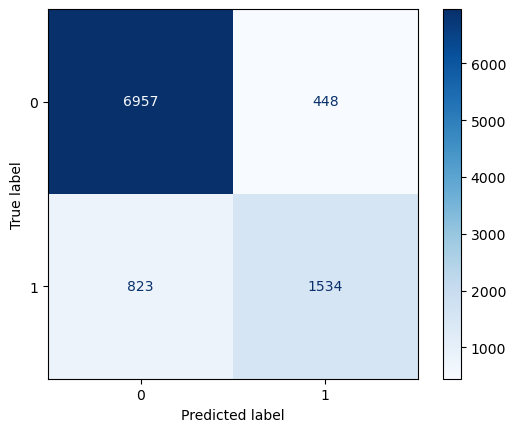

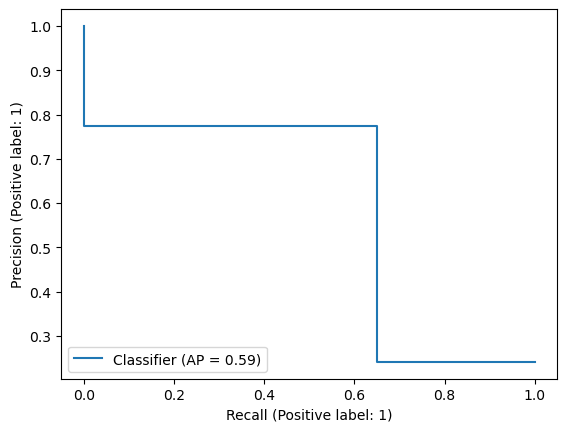

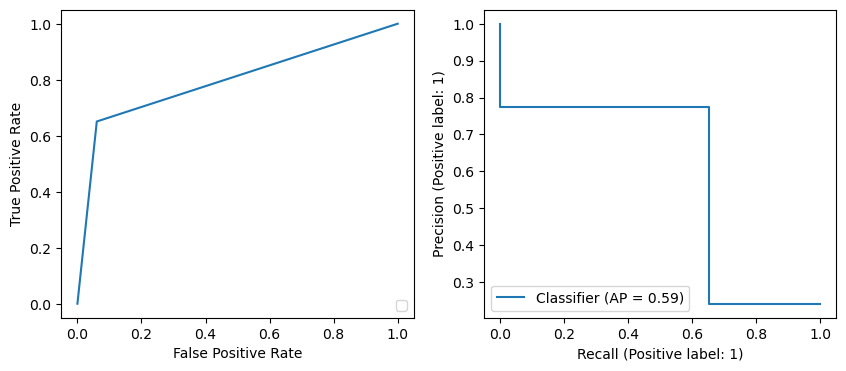

------------------------------


In [22]:
from sklearn.model_selection import train_test_split

start_time = time.time()
# Initialize the CatBoost classifier
model = cb.CatBoostClassifier(iterations=1000,  # Number of boosting iterations (trees)
                                       learning_rate=0.1,  # Learning rate (controls the step size during optimization)
                                       depth=6,  # Depth of the trees
                                       loss_function='MultiClass',  # For multi-class classification tasks
                                       eval_metric='Accuracy',  # Evaluation metric during training
                                       random_seed=42)  # Random seed for reproducibility

# Fit the model on the training data
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("CatBoostClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

[LightGBM] [Info] Number of positive: 5482, number of negative: 17293
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 22775, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240703 -> initscore=-1.148832
[LightGBM] [Info] Start training from score -1.148832


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Training time: 0.30 seconds
Training Accuracy : 0.8841712403951701

Accuracy: 0.8689817660315509

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7405
           1       0.77      0.65      0.70      2357

    accuracy                           0.87      9762
   macro avg       0.83      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762


Confusion matirx :
[[6958  447]
 [ 832 1525]]

AUC-ROC Score: 0.9234085432878117

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


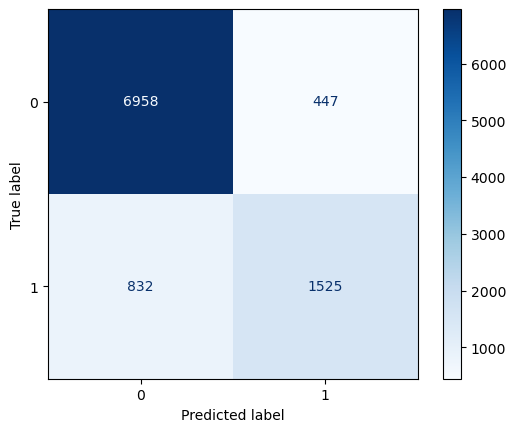

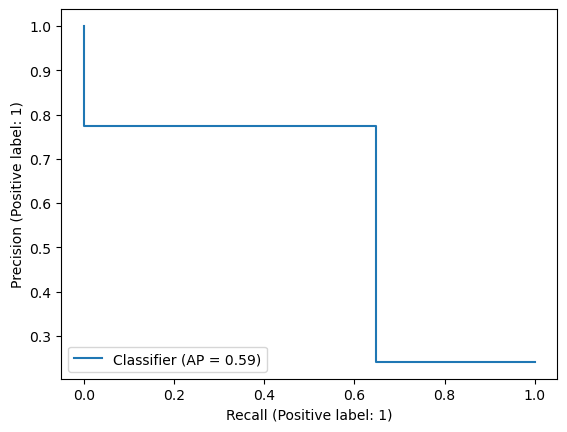

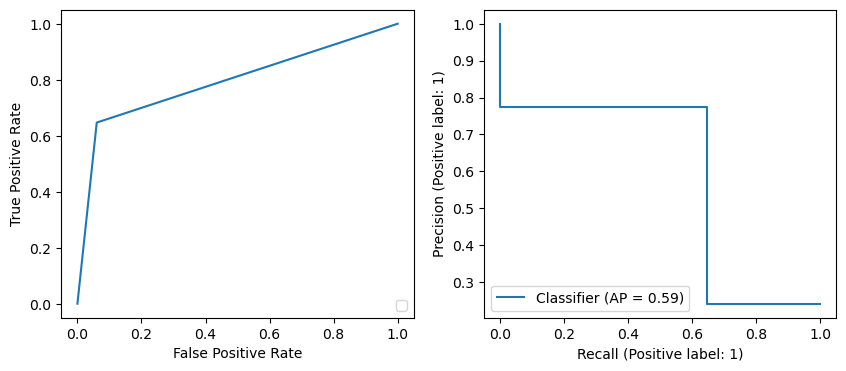

------------------------------


In [23]:
start_time = time.time()
# Assuming you have your features and labels in the variables X_train and y_train
model = lgb.LGBMClassifier(boosting_type='gbdt',  # 'gbdt' for gradient boosting decision trees
                                    num_leaves=31,  # Number of leaves in each decision tree
                                    learning_rate=0.05,  # Learning rate (controls the step size during optimization)
                                    n_estimators=100,  # Number of boosting iterations (trees)
                                    objective='binary',  # For multi-class classification tasks
                                    random_state=42)  # Random seed for reproducibility

# Fit the model on the training data
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("LGBMClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Training time: 64.21 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Training Accuracy : 0.8913282107574094

Accuracy: 0.866318377381684

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7405
           1       0.76      0.65      0.70      2357

    accuracy                           0.87      9762
   macro avg       0.83      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762


Confusion matirx :
[[6915  490]
 [ 815 1542]]
predict_proba is not available when voting='hard'

Plotting Graphs



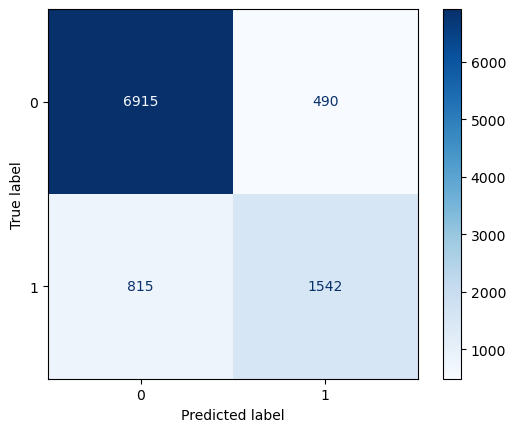

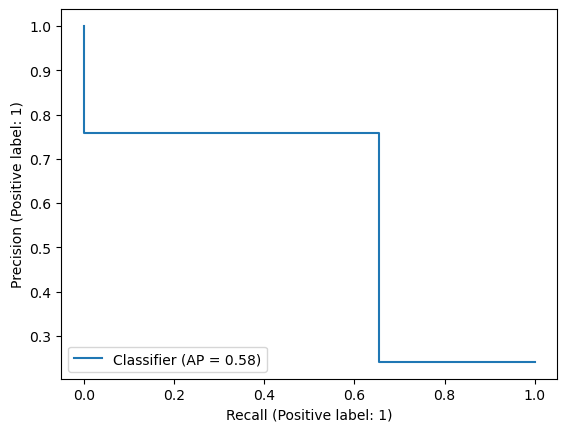

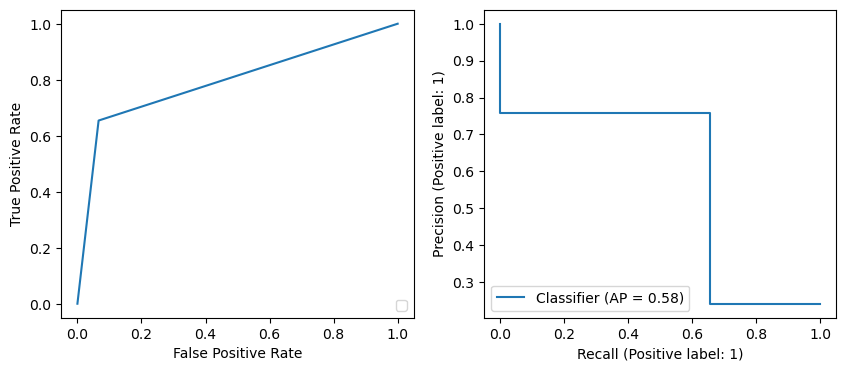

------------------------------


In [24]:
# Create individual models
logreg_model = LogisticRegression()

rf_model = RandomForestClassifier()

svc_model = SVC()

gb_model = GradientBoostingClassifier()

xgb_model = XGBClassifier()

hgb_model = HistGradientBoostingClassifier()

imb_rf_model = BalancedRandomForestClassifier()

easy_model = EasyEnsembleClassifier()

adb_model = AdaBoostClassifier()

list_of_models = [('logreg', logreg_model), ('rf', rf_model), ('gb', gb_model),
('svm',svc_model),('xgb',xgb_model),("hgb",hgb_model),
('imb_rf',imb_rf_model),("easy",easy_model),("adb",adb_model)]


start_time = time.time()
# Create an ensemble model using VotingClassifier
model = VotingClassifier(
    estimators=[('logreg', logreg_model), ('rf', rf_model), ('gb', gb_model),
('svm',svc_model),('xgb',xgb_model),("hgb",hgb_model),
('imb_rf',imb_rf_model),("easy",easy_model),("adb",adb_model)],
    voting='hard'  # Use majority voting for predictions
)

# Train the ensemble model
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("HistGradientBoostingClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Training time: 215.02 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Training Accuracy : 0.8884742041712403

Accuracy: 0.8647818070067609

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7405
           1       0.75      0.65      0.70      2357

    accuracy                           0.86      9762
   macro avg       0.82      0.79      0.81      9762
weighted avg       0.86      0.86      0.86      9762


Confusion matirx :
[[6905  500]
 [ 820 1537]]
predict_proba is not available when voting='hard'

Plotting Graphs



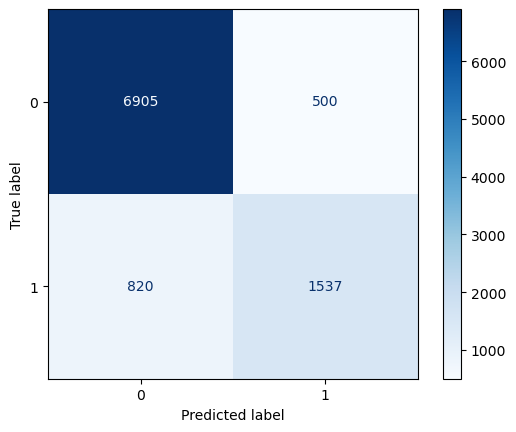

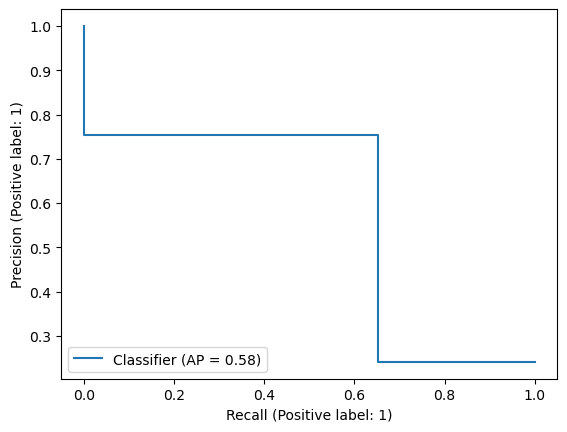

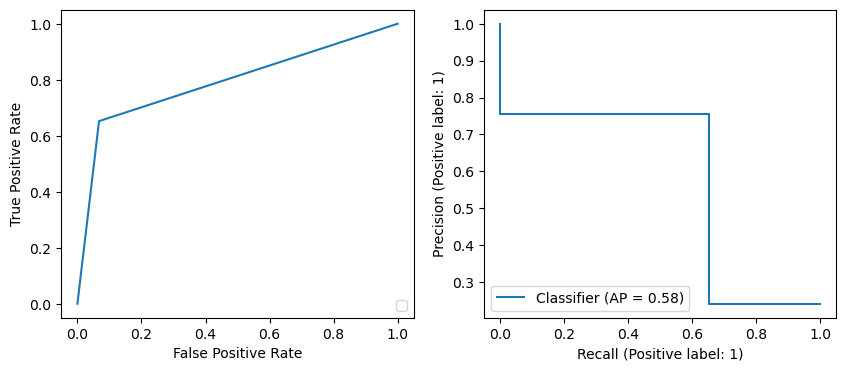

------------------------------


In [25]:
# Create individual models
logreg_model = LogisticRegression(C = 0.1, penalty = 'l2')

rf_model = RandomForestClassifier(max_depth=20, n_estimators=200)

svc_model = SVC(C = 1, kernel = 'rbf')

gb_model = GradientBoostingClassifier(learning_rate=0.2, n_estimators=300)

xgb_model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None)

hgb_model = HistGradientBoostingClassifier(learning_rate = 0.1, max_depth = 20)

imb_rf_model = BalancedRandomForestClassifier(n_estimators=300)

easy_model = EasyEnsembleClassifier(n_estimators=100)

adb_model = AdaBoostClassifier(learning_rate=0.2, n_estimators=200)

list_of_models = [('logreg', logreg_model), ('rf', rf_model), ('gb', gb_model),
('svm',svc_model),('xgb',xgb_model),("hgb",hgb_model),
('imb_rf',imb_rf_model),("easy",easy_model),("adb",adb_model)]


start_time = time.time()
# Create an ensemble model using VotingClassifier
model = VotingClassifier(
    estimators=[('logreg', logreg_model), ('rf', rf_model), ('gb', gb_model),
('svm',svc_model),('xgb',xgb_model),("hgb",hgb_model),
('imb_rf',imb_rf_model),("easy",easy_model),("adb",adb_model)],
    voting='hard'  # Use majority voting for predictions
)


# Train the ensemble model
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("HistGradientBoostingClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")